In [200]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [17]:
df = pd.read_csv('야수_전처리_ver09.csv')
df

,FA년도,구단명,선수명,포지션,투,타,구분,FA등급,플레이년도,나이,...,타격 WPA,주루 WPA,WPA+,WPA-,WPA,1점 홈런,2점 홈런,3점 홈런,만루 홈런,선수명_수정
0,2011,롯데,강민호(2011),C,우투,우타,신규,A,2010,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강민호
1,2012,롯데,강민호(2011),C,우투,우타,신규,A,2011,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강민호
2,2013,롯데,강민호(2011),C,우투,우타,신규,A,2012,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강민호
3,2014,롯데,강민호(2011),C,우투,우타,신규,A,2013,28,...,2.10,0.12,9.13,-6.91,2.23,4.0,3.0,4.0,0.0,강민호
4,2015,롯데,강민호(2015),C,우투,우타,FA 1년차,A,2014,29,...,-0.36,-0.04,6.05,-6.44,-0.40,11.0,5.0,0.0,0.0,강민호
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2019,KT,황재균(2019),3B,우투,우타,FA 1년차,B,2018,31,...,1.98,0.03,11.71,-9.70,2.01,17.0,5.0,2.0,1.0,황재균
665,2020,KT,황재균(2019),3B,우투,우타,재자격,B,2019,32,...,1.95,0.12,10.99,-8.92,2.07,15.0,4.0,1.0,0.0,황재균
666,2021,KT,황재균(2019),3B,우투,우타,재자격,B,2020,33,...,3.62,0.12,13.38,-9.64,3.73,12.0,6.0,3.0,0.0,황재균
667,2022,KT,황재균(2019),3B,우투,우타,재자격,B,2021,34,...,-0.49,0.10,8.61,-9.00,-0.39,7.0,1.0,2.0,0.0,황재균


In [87]:
cols = ['나이',
       '게임수', '타석수', '타수', '득점', '안타', '2루타', '3루타', '사구', '홈런', '타점', '도루성공',
       '도루실패', '볼넷', '삼진', '병살타', '희생플라이', '공격WAR', '연봉',
       'FA 계약 연수', 'FA 계약 총액', 'wRC+', '장타율', '출루율', 'OPS', '국대출전횟수', '원클럽맨여부', '타격 WPA', '주루 WPA', 'WPA+',
       'WPA-', 'WPA', '1점 홈런', '2점 홈런 ', '3점 홈런', '만루 홈런']

In [93]:
target_col = 'FA 계약 총액'
other_cols = [col for col in cols if col != target_col]

corr_matrix = df[[target_col] + other_cols].corr()

correlations = corr_matrix.loc[target_col].drop(target_col)

correlations

나이         -0.014848
게임수         0.148767
타석수         0.196684
타수          0.188495
득점          0.199069
안타          0.183532
2루타         0.190906
3루타         0.011430
사구          0.160330
홈런          0.152178
타점          0.183117
도루성공        0.064910
도루실패        0.036994
볼넷          0.210216
삼진          0.152500
병살타         0.119071
희생플라이       0.117428
공격WAR       0.215933
연봉          0.224197
FA 계약 연수    0.840287
wRC+        0.175696
장타율         0.124851
출루율         0.134317
OPS         0.136035
국대출전횟수      0.195562
원클럽맨여부      0.029784
타격 WPA      0.134327
주루 WPA      0.057456
WPA+        0.215510
WPA-       -0.186637
WPA         0.169534
1점 홈런       0.162926
2점 홈런       0.092405
3점 홈런       0.124004
만루 홈런       0.044673
Name: FA 계약 총액, dtype: float64

In [101]:
df1= df.copy()

In [218]:
df1 = df1.dropna()

In [165]:
df1 = df1[df1['구분'] != 'FA 1년차']

In [167]:
X = df1[feature_cols]
y = df1[target_col]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     45.59
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          6.43e-117
Time:                        11:00:12   Log-Likelihood:                -5776.3
No. Observations:                 440   AIC:                         1.162e+04
Df Residuals:                     405   BIC:                         1.177e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.492e+05   1.69e+05      2.651      0.0

In [198]:
df1["1점 홈런 비율"] = df1["1점 홈런"] / df1["홈런"]
df1["2점 홈런 비율"] = df1["2점 홈런 "] / df1["홈런"]
df1["3점 홈런 비율"] = df1["3점 홈런"] / df1["홈런"]
df1["만루 홈런 비율"] = df1["만루 홈런"] / df1["홈런"]

### 시각화

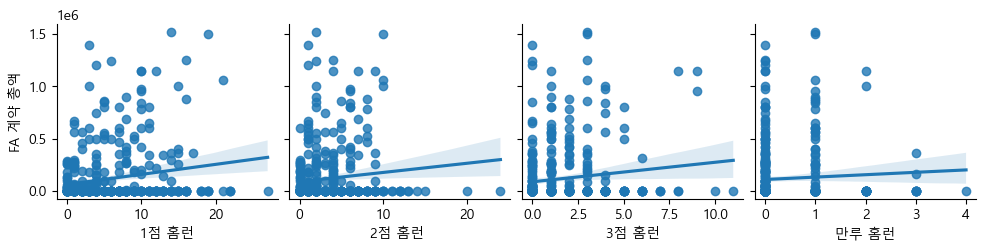

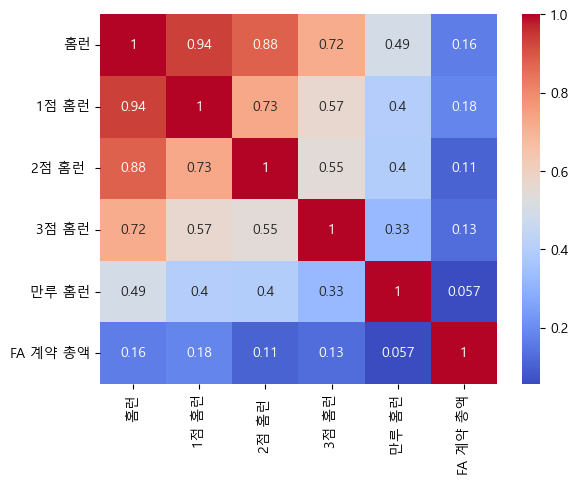

In [175]:
sns.pairplot(df1, x_vars=['1점 홈런', '2점 홈런 ', '3점 홈런', '만루 홈런'], y_vars='FA 계약 총액', kind='reg')
plt.show()

cols = ['홈런', '1점 홈런', '2점 홈런 ', '3점 홈런', '만루 홈런', 'FA 계약 총액']

corr_matrix = df1[cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

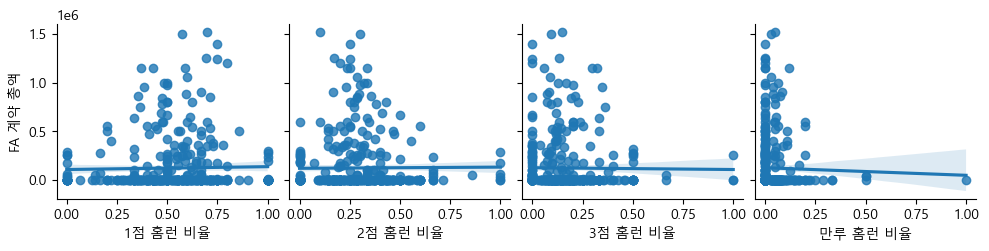

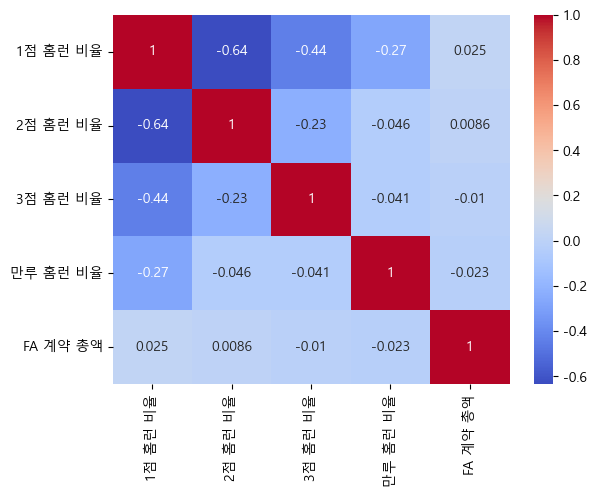

In [250]:
sns.pairplot(df1, x_vars=["1점 홈런 비율", "2점 홈런 비율", "3점 홈런 비율", "만루 홈런 비율"], y_vars='FA 계약 총액', kind='reg')
plt.show()

cols = ["1점 홈런 비율", "2점 홈런 비율", "3점 홈런 비율", "만루 홈런 비율", 'FA 계약 총액']

corr_matrix = df1[cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 상관계수

In [176]:
df1[['1점 홈런', '2점 홈런 ', '3점 홈런', '만루 홈런', 'FA 계약 총액']].corr()

,1점 홈런,2점 홈런,3점 홈런,만루 홈런,FA 계약 총액
1점 홈런,1.000000,0.728348,0.567125,0.402371,0.182952
2점 홈런,0.728348,1.000000,0.546322,0.399433,0.108307
3점 홈런,0.567125,0.546322,1.000000,0.325153,0.127934
만루 홈런,0.402371,0.399433,0.325153,1.000000,0.056818
FA 계약 총액,0.182952,0.108307,0.127934,0.056818,1.000000


In [194]:
df1[["1점 홈런 비율", "2점 홈런 비율", "3점 홈런 비율", "만루 홈런 비율", 'FA 계약 총액']].corr()

,1점 홈런 비율,2점 홈런 비율,3점 홈런 비율,만루 홈런 비율,FA 계약 총액
1점 홈런 비율,1.000000,-0.635394,-0.441788,-0.274059,0.024570
2점 홈런 비율,-0.635394,1.000000,-0.226668,-0.046157,0.008618
3점 홈런 비율,-0.441788,-0.226668,1.000000,-0.041288,-0.010216
만루 홈런 비율,-0.274059,-0.046157,-0.041288,1.000000,-0.023043
FA 계약 총액,0.024570,0.008618,-0.010216,-0.023043,1.000000


### 갯수 회귀 분석

In [177]:
X = sm.add_constant(df1['1점 홈런'])
y = df1['FA 계약 총액']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     15.17
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           0.000114
Time:                        11:00:21   Log-Likelihood:                -6115.2
No. Observations:                 440   AIC:                         1.223e+04
Df Residuals:                     438   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.281e+04    1.9e+04      3.299      0.0

In [178]:
X = sm.add_constant(df1['2점 홈런 '])
y = df1['FA 계약 총액']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.199
Date:                Tue, 29 Jul 2025   Prob (F-statistic):             0.0231
Time:                        11:00:21   Log-Likelihood:                -6120.0
No. Observations:                 440   AIC:                         1.224e+04
Df Residuals:                     438   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.009e+04   1.78e+04      5.061      0.0

In [180]:
X = sm.add_constant(df1['3점 홈런'])
y = df1['FA 계약 총액']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.288
Date:                Tue, 29 Jul 2025   Prob (F-statistic):            0.00721
Time:                        11:00:21   Log-Likelihood:                -6119.0
No. Observations:                 440   AIC:                         1.224e+04
Df Residuals:                     438   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.828e+04   1.69e+04      5.219      0.0

In [185]:
X = sm.add_constant(df1['만루 홈런'])
y = df1['FA 계약 총액']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.419
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.234
Time:                        11:00:21   Log-Likelihood:                -6121.9
No. Observations:                 440   AIC:                         1.225e+04
Df Residuals:                     438   BIC:                         1.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.103e+05   1.45e+04      7.593      0.0

In [238]:
X = df1[['1점 홈런', '2점 홈런 ', '3점 홈런', '만루 홈런']]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.134
Date:                Tue, 29 Jul 2025   Prob (F-statistic):             0.0148
Time:                        14:32:43   Log-Likelihood:                -5711.0
No. Observations:                 410   AIC:                         1.143e+04
Df Residuals:                     405   BIC:                         1.145e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.915e+04   2.21e+04      3.132      0.0

### 비율 회귀분석

In [240]:
X = df1[["1점 홈런 비율"]]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2464
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.620
Time:                        14:33:02   Log-Likelihood:                -5717.1
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     408   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.092e+05   3.48e+04      3.140      0.0

In [242]:
X = df1[["2점 홈런 비율"]]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03030
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.862
Time:                        14:33:11   Log-Likelihood:                -5717.2
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     408   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.217e+05   2.36e+04      5.148      0.0

In [244]:
X = df1[["3점 홈런 비율"]]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04259
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.837
Time:                        14:33:17   Log-Likelihood:                -5717.2
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     408   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.278e+05   1.89e+04      6.778      0.0

In [246]:
X = df1[["만루 홈런 비율"]]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.642
Time:                        14:33:22   Log-Likelihood:                -5717.1
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     408   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.276e+05   1.46e+04      8.713      0.0

In [248]:
X = df1[["1점 홈런 비율", "2점 홈런 비율", "3점 홈런 비율", "만루 홈런 비율"]]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3154
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.868
Time:                        14:33:26   Log-Likelihood:                -5716.6
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     405   BIC:                         1.146e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.576e+04   1.68e+05     -0.213      0.8

### 홈런 기여점수

In [206]:
df1['홈런기여점수'] = (
    df1['1점 홈런'] * 1 +
    df1['2점 홈런 '] * 2 +
    df1['3점 홈런'] * 3 +
    df1['만루 홈런'] * 4
)


df1['평균홈런기여'] = df1['홈런기여점수'] / df1['홈런']

In [222]:
df1[['홈런기여점수','평균홈런기여','FA 계약 총액']].corr()

,홈런기여점수,평균홈런기여,FA 계약 총액
홈런기여점수,1.000000,0.216887,0.133887
평균홈런기여,0.216887,1.000000,-0.007956
FA 계약 총액,0.133887,-0.007956,1.000000


In [220]:
X = df1[['홈런기여점수','평균홈런기여']]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.018
Date:                Tue, 29 Jul 2025   Prob (F-statistic):             0.0187
Time:                        13:05:28   Log-Likelihood:                -5713.2
No. Observations:                 410   AIC:                         1.143e+04
Df Residuals:                     407   BIC:                         1.144e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.192e+05   5.65e+04      2.109      0.0

In [230]:
X = df1[['홈런기여점수']]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.447
Date:                Tue, 29 Jul 2025   Prob (F-statistic):            0.00663
Time:                        14:30:33   Log-Likelihood:                -5713.5
No. Observations:                 410   AIC:                         1.143e+04
Df Residuals:                     408   BIC:                         1.144e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.887e+04   2.17e+04      3.641      0.0

In [234]:
X = df1[['평균홈런기여']]
X = sm.add_constant(X)
y = df1['FA 계약 총액']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               FA 계약 총액   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02583
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.872
Time:                        14:30:52   Log-Likelihood:                -5717.2
No. Observations:                 410   AIC:                         1.144e+04
Df Residuals:                     408   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.339e+05   5.67e+04      2.360      0.0